[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/keras-team/autokeras/blob/master/docs/templates/tutorial/image_classification.ipynb)

In [1]:
import tensorflow as tf
import autokeras as ak
tf.__version__

'2.1.0'

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[6], 'GPU')

### Load MNIST dataset

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Training image shape:', x_train.shape) # (60000, 28, 28)
print('Training label shape:', y_train.shape) # (60000,)
print('First five training labels:', y_train[:5]) # array([5 0 4 1 9], dtype=uint8)

Training image shape: (60000, 28, 28)
Training label shape: (60000,)
First five training labels: [5 0 4 1 9]


### ResNetBlock

In [5]:
import autokeras as ak

input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node = ak.ResNetBlock(version='v2', pooling='max')(output_node)
output_node = ak.ClassificationHead()(output_node)

auto_model = ak.AutoModel(
    inputs=input_node, 
    outputs=output_node,
    max_trials=3)

auto_model.fit(x_train, y_train,epochs=3, verbose=2)

Train for 1500 steps, validate for 375 steps
Epoch 1/3
1500/1500 - 152s - loss: 0.2428 - accuracy: 0.9348 - val_loss: 0.4327 - val_accuracy: 0.9032
Epoch 2/3
1500/1500 - 111s - loss: 0.1123 - accuracy: 0.9696 - val_loss: 0.1501 - val_accuracy: 0.9661
Epoch 3/3
1500/1500 - 123s - loss: 0.1000 - accuracy: 0.9740 - val_loss: 0.0948 - val_accuracy: 0.9762


Train for 1500 steps, validate for 375 steps
Epoch 1/3
1500/1500 - 348s - loss: 0.2776 - accuracy: 0.9229 - val_loss: 0.1176 - val_accuracy: 0.9679
Epoch 2/3
1500/1500 - 298s - loss: 0.1372 - accuracy: 0.9631 - val_loss: 0.4872 - val_accuracy: 0.8541
Epoch 3/3
1500/1500 - 293s - loss: 0.0933 - accuracy: 0.9745 - val_loss: 0.1331 - val_accuracy: 0.9672


Train for 1500 steps, validate for 375 steps
Epoch 1/3
1500/1500 - 297s - loss: 0.2806 - accuracy: 0.9214 - val_loss: 0.1163 - val_accuracy: 0.9704
Epoch 2/3
1500/1500 - 234s - loss: 0.1251 - accuracy: 0.9684 - val_loss: 0.1702 - val_accuracy: 0.9619
Epoch 3/3
1500/1500 - 260s - loss: 0.1083 - accuracy: 0.9728 - val_loss: 0.0670 - val_accuracy: 0.9813


INFO:tensorflow:Oracle triggered exit
Train for 1875 steps, validate for 375 steps
Epoch 1/3
1875/1875 - 339s - loss: 0.2611 - accuracy: 0.9288 - val_loss: 0.2148 - val_accuracy: 0.9544
Epoch 2/3
1875/1875 - 288s - loss: 0.1153 - accuracy: 0.9706 - val_loss: 0.1038 - val_accuracy: 0.9719
Epoch 3/3
1875/1875 - 305s - loss: 0.1076 - accuracy: 0.9738 - val_loss: 0.2162 - val_accuracy: 0.9401


### Get the summarized results during the tuning process (return the best 10 models if existed)

In [6]:
auto_model.tuner.results_summary()

### Retrieve best model

In [7]:
best_model = auto_model.export_model()
best_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
normalization (Normalization)   (None, 28, 28, 1)    3           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 34, 34, 1)    0           normalization[0][0]              
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 14, 14, 64)   3200        conv1_pad[0][0]                  
______________________________________________________________________________________________

__________________________________________________________________________________________________
conv3_block4_1_bn (BatchNormali (None, 4, 4, 128)    512         conv3_block4_1_conv[0][0]        
__________________________________________________________________________________________________
conv3_block4_1_relu (Activation (None, 4, 4, 128)    0           conv3_block4_1_bn[0][0]          
__________________________________________________________________________________________________
conv3_block4_2_pad (ZeroPadding (None, 6, 6, 128)    0           conv3_block4_1_relu[0][0]        
__________________________________________________________________________________________________
conv3_block4_2_conv (Conv2D)    (None, 4, 4, 128)    147456      conv3_block4_2_pad[0][0]         
__________________________________________________________________________________________________
conv3_block4_2_bn (BatchNormali (None, 4, 4, 128)    512         conv3_block4_2_conv[0][0]        
__________

conv4_block3_1_conv (Conv2D)    (None, 2, 2, 256)    262144      conv4_block3_preact_relu[0][0]   
__________________________________________________________________________________________________
conv4_block3_1_bn (BatchNormali (None, 2, 2, 256)    1024        conv4_block3_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block3_1_relu (Activation (None, 2, 2, 256)    0           conv4_block3_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block3_2_pad (ZeroPadding (None, 4, 4, 256)    0           conv4_block3_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block3_2_conv (Conv2D)    (None, 2, 2, 256)    589824      conv4_block3_2_pad[0][0]         
__________________________________________________________________________________________________
conv4_bloc

__________________________________________________________________________________________________
conv4_block10_1_relu (Activatio (None, 2, 2, 256)    0           conv4_block10_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_block10_2_pad (ZeroPaddin (None, 4, 4, 256)    0           conv4_block10_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block10_2_conv (Conv2D)   (None, 2, 2, 256)    589824      conv4_block10_2_pad[0][0]        
__________________________________________________________________________________________________
conv4_block10_2_bn (BatchNormal (None, 2, 2, 256)    1024        conv4_block10_2_conv[0][0]       
__________________________________________________________________________________________________
conv4_block10_2_relu (Activatio (None, 2, 2, 256)    0           conv4_block10_2_bn[0][0]         
__________

conv4_block17_2_pad (ZeroPaddin (None, 4, 4, 256)    0           conv4_block17_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block17_2_conv (Conv2D)   (None, 2, 2, 256)    589824      conv4_block17_2_pad[0][0]        
__________________________________________________________________________________________________
conv4_block17_2_bn (BatchNormal (None, 2, 2, 256)    1024        conv4_block17_2_conv[0][0]       
__________________________________________________________________________________________________
conv4_block17_2_relu (Activatio (None, 2, 2, 256)    0           conv4_block17_2_bn[0][0]         
__________________________________________________________________________________________________
conv4_block17_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      conv4_block17_2_relu[0][0]       
__________________________________________________________________________________________________
conv4_bloc

__________________________________________________________________________________________________
conv5_block1_2_conv (Conv2D)    (None, 1, 1, 512)    2359296     conv5_block1_2_pad[0][0]         
__________________________________________________________________________________________________
conv5_block1_2_bn (BatchNormali (None, 1, 1, 512)    2048        conv5_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_block1_2_relu (Activation (None, 1, 1, 512)    0           conv5_block1_2_bn[0][0]          
__________________________________________________________________________________________________
conv5_block1_0_conv (Conv2D)    (None, 1, 1, 2048)   2099200     conv5_block1_preact_relu[0][0]   
__________________________________________________________________________________________________
conv5_block1_3_conv (Conv2D)    (None, 1, 1, 2048)   1050624     conv5_block1_2_relu[0][0]        
__________


### Predict with the best model.


In [8]:
predicted_y = auto_model.predict(x_test)
print(predicted_y)

[[7]
 [2]
 [1]
 ...
 [4]
 [5]
 [6]]


### Evaluate the best model on the test data.

In [9]:

test_loss, test_acc = auto_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: ', test_acc)


Test accuracy:  0.9364


### XceptionBlock

In [11]:
import autokeras as ak

input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node = ak.XceptionBlock(num_residual_blocks=8, pooling='max')(output_node)
output_node = ak.ClassificationHead()(output_node)

auto_model = ak.AutoModel(
    inputs=input_node, 
    outputs=output_node,
    max_trials=3)

auto_model.fit(x_train, y_train,epochs=3, verbose=2)

Train for 1500 steps, validate for 375 steps
Epoch 1/3
1500/1500 - 80s - loss: 0.3737 - accuracy: 0.9325 - val_loss: 0.1804 - val_accuracy: 0.9598
Epoch 2/3
1500/1500 - 64s - loss: 0.1065 - accuracy: 0.9770 - val_loss: 0.0827 - val_accuracy: 0.9825
Epoch 3/3
1500/1500 - 62s - loss: 0.0686 - accuracy: 0.9830 - val_loss: 0.0912 - val_accuracy: 0.9797


Train for 1500 steps, validate for 375 steps
Epoch 1/3
1500/1500 - 56s - loss: 0.3705 - accuracy: 0.8852 - val_loss: 0.1031 - val_accuracy: 0.9709
Epoch 2/3
1500/1500 - 48s - loss: 0.1262 - accuracy: 0.9625 - val_loss: 0.0754 - val_accuracy: 0.9776
Epoch 3/3
1500/1500 - 48s - loss: 0.1102 - accuracy: 0.9689 - val_loss: 0.0794 - val_accuracy: 0.9775


Train for 1500 steps, validate for 375 steps
Epoch 1/3
1500/1500 - 93s - loss: 0.2874 - accuracy: 0.9112 - val_loss: 0.1463 - val_accuracy: 0.9609
Epoch 2/3
1500/1500 - 87s - loss: 0.1150 - accuracy: 0.9683 - val_loss: 0.1377 - val_accuracy: 0.9692
Epoch 3/3
1500/1500 - 86s - loss: 0.1000 - accuracy: 0.9740 - val_loss: 0.0822 - val_accuracy: 0.9820


INFO:tensorflow:Oracle triggered exit
Train for 1875 steps, validate for 375 steps
Epoch 1/3
1875/1875 - 65s - loss: 0.3383 - accuracy: 0.8963 - val_loss: 0.1772 - val_accuracy: 0.9419
Epoch 2/3
1875/1875 - 59s - loss: 0.1203 - accuracy: 0.9650 - val_loss: 0.0669 - val_accuracy: 0.9793
Epoch 3/3
1875/1875 - 61s - loss: 0.1058 - accuracy: 0.9712 - val_loss: 0.0525 - val_accuracy: 0.9845


### Display the best model

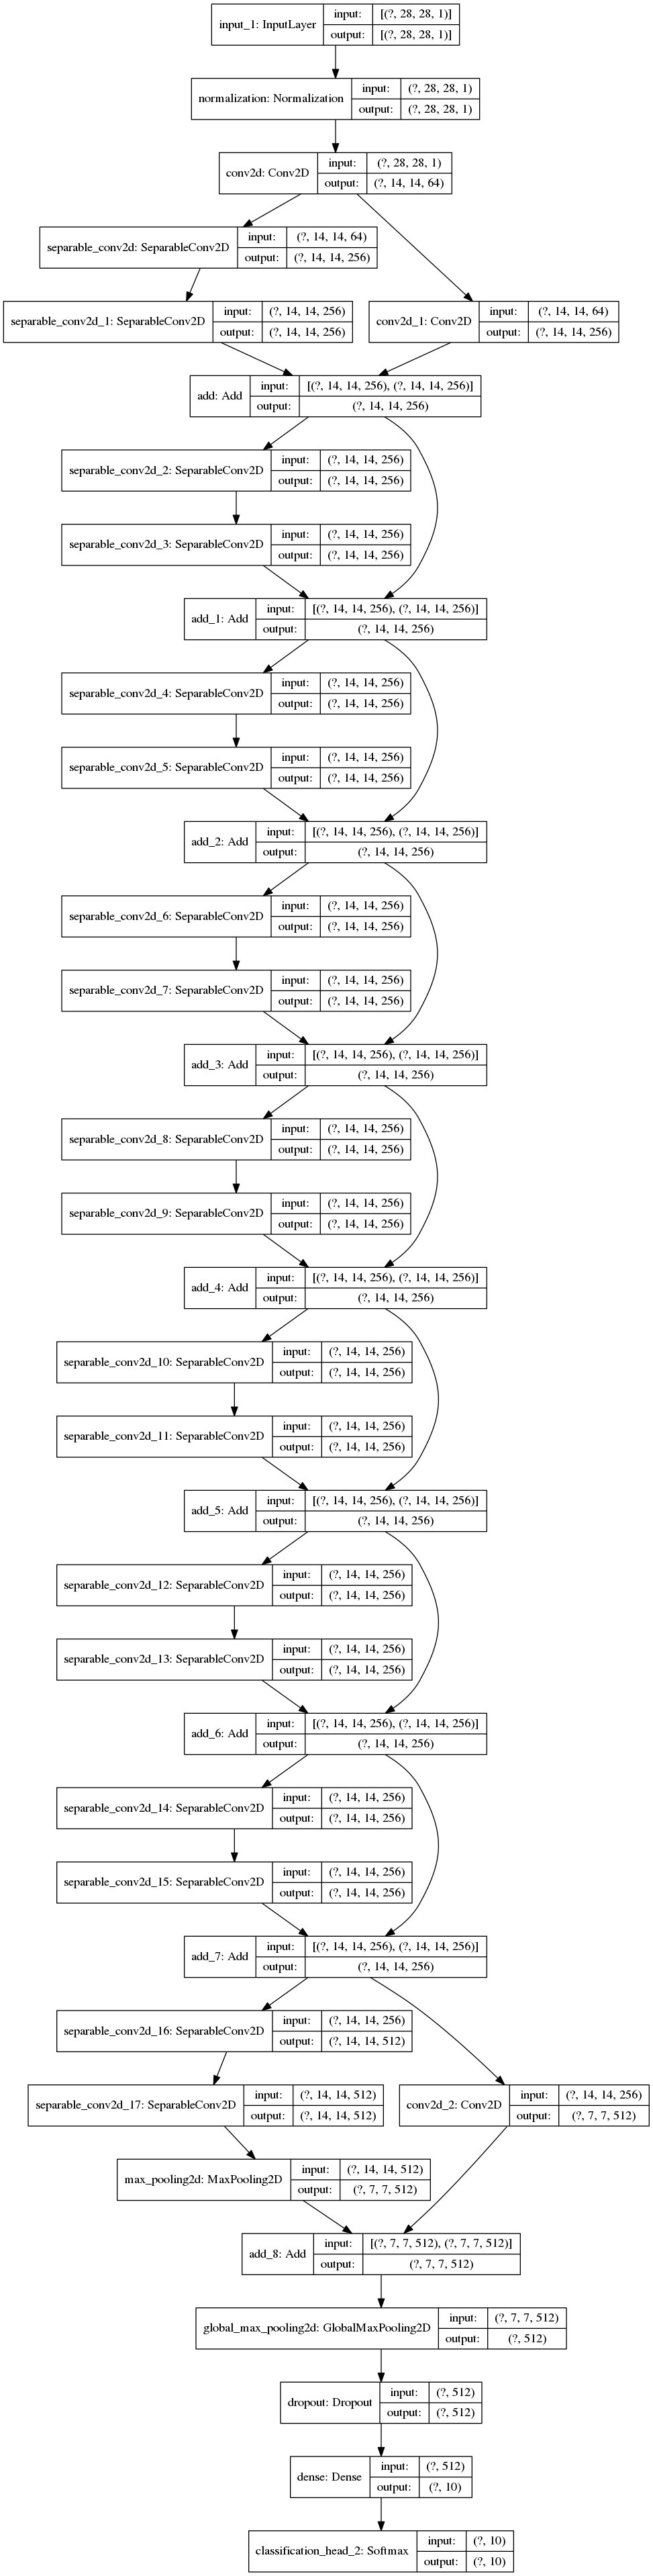

In [12]:
best_model = auto_model.export_model()
tf.keras.utils.plot_model(best_model, show_shapes=True, expand_nested=True) # rankdir='LR'

In [13]:
best_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
normalization (Normalization)   (None, 28, 28, 1)    3           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 14, 14, 64)   1664        normalization[0][0]              
__________________________________________________________________________________________________
separable_conv2d (SeparableConv (None, 14, 14, 256)  17216       conv2d[0][0]                     
______________________________________________________________________________________________

## Reference
[ImageClassifier](/image_classifier),
[AutoModel](/auto_model/#automodel-class),
[ImageBlock](/block/#imageblock-class),
[Normalization](/preprocessor/#normalization-class),
[ImageAugmentation](/preprocessor/#image-augmentation-class),
[ResNetBlock](/block/#resnetblock-class),
[ImageInput](/node/#imageinput-class),
[ClassificationHead](/head/#classificationhead-class).